## McNulty - Error Analysis Challenges

We will go back to the original Supervised Learning Challenges.

By:       Reshama

Updated:  8/19/15

**Settings:  Where applicable, use test_size=0.30, random_state=4444.  This will permit comparison of results across users.**

##Table of Contents 
[Challenge01](#1) 

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

[Challenge02](#2)

For each, draw the ROC curve and calculate the AUC.

[Challenge03](#3)

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9)

[Challenge04](#4)

For your movie classifiers, calculate the precision and recall for each class.

[Challenge05](#5)

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12

### <a id='1'></a> Challenge 1

####Data:  house-votes-84.data

https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

### Accuracy / Precision / Recall / F1

In [6]:
from IPython.core.display import HTML 
HTML('<img src="precision_recall.png" width=400 height=200/>') 

###Accuracy

Percent of correctly predicted (1 to 1 and 0 to 0)
Assumes equal cost for either type of error.

$Accuracy = \frac{\ (a \ + \ d)}{(a \ + \ b \ + \ c \ + \ d)}$



###Precision

How many of the returned documents are correct

$Precision = \frac{a}{(a \ +  \ c)}$

###Recall

How many of the positives does the model return

$Recall = \frac{a}{(a \ + b)}$



###F1

Harmonic average of precision and recall


$F1 = \frac{\ 2\ *\ (Precision \ x \ Recall)}{(Precision \ + \ Recall)}$




In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [8]:
# read in pandas dataframe
representatives = pd.read_csv("house-votes-84.data", header=None)
representatives.head(3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican.
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican.
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat.


In [9]:
#!ls -alF

In [10]:
# replaces y, n with numeric 1, 0
representatives = representatives.replace('y',1)
representatives = representatives.replace('n',0)
representatives = representatives.replace('?',np.nan)

#replace '?' values with the column mean
for column in range(0,16):
    colmean = representatives[column].mean()
    representatives.loc[np.isnan(representatives[column]), column] = colmean

representatives.head(3)
#representatives.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00000,1,0,1.000000,1,1,0,0,0,1,0.362319,1,1,1,0,1.000000,republican.
1,0.00000,1,0,1.000000,1,1,0,0,0,0,0.000000,1,1,1,0,0.812689,republican.
2,0.44208,1,1,0.417453,1,1,0,0,0,0,1.000000,0,1,1,0,0.000000,democrat.


In [11]:
# Set Y to numeric

print 'BEFORE setting republican/democrat to numeric \n'
by_party = representatives.groupby(16)
print by_party.count()

rep = representatives.replace('republican.',1.0)
rep = rep.replace('republican',1.0)
rep = rep.replace('democrat.',0.0)
rep = rep.replace('democrat',0.0) 

print '\nAFTER setting republican/democrat to numeric '
by_party = rep.groupby(16)
print by_party.count()


BEFORE setting republican/democrat to numeric 

              0    1    2    3    4    5    6    7    8    9    10   11   12  \
16                                                                             
democrat     262  262  262  262  262  262  262  262  262  262  262  262  262   
democrat.      5    5    5    5    5    5    5    5    5    5    5    5    5   
republican   166  166  166  166  166  166  166  166  166  166  166  166  166   
republican.    2    2    2    2    2    2    2    2    2    2    2    2    2   

              13   14   15  
16                          
democrat     262  262  262  
democrat.      5    5    5  
republican   166  166  166  
republican.    2    2    2  

AFTER setting republican/democrat to numeric 
     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
16                                                                              
0   267  267  267  267  267  267  267  267  267  267  267  267  267  267  267   
1   168

In [12]:
representatives = rep

In [13]:
from sklearn.cross_validation import train_test_split

X = representatives[range(0,16)]
Y = representatives[16]

print "repres,  len, shape: ", len(representatives), representatives.shape
print "X--> len, shape(X): ", len(X), X.shape
print "Y--> len, shape(Y): ", len(Y), Y.shape

print "\n"
#print X.head()
print Y.head()

testpct = 0.30
#testpct = 0.25

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=testpct, random_state=4444)

repres,  len, shape:  435 (435, 17)
X--> len, shape(X):  435 (435, 16)
Y--> len, shape(Y):  435 (435,)


0    1
1    1
2    0
3    0
4    0
Name: 16, dtype: float64


In [17]:
# Challenge 1
# For the house representatives data set, calculate the accuracy, precision, recall and f1 scores 
# of each classifier you built (on the test set).

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
    
y_obs = Y_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [KNeighborsClassifier(n_neighbors=10),
            LogisticRegression(C=0.001), 
            SVC(),  
            GaussianNB(), 
            DecisionTreeClassifier(), 
            RandomForestClassifier()]:
     
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred)
    recall_dict[alg_label] = recall_score(y_obs, y_pred)
    f1_dict[alg_label] = f1_score(y_obs, y_pred)

    print '\n'
    print alg_label
    print '-'*20
    print
    print "classification report"
    print classification_report(y_obs, y_pred)
    print
    print '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred))
    print '   precision score            %.4f ' % precision_score(y_obs, y_pred)
    print '   recall score               %.4f ' % recall_score(y_obs, y_pred)
    print '   f1 score                   %.4f ' % f1_score(y_obs, y_pred)
    
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print '  %s %.4f' % (newclf, v)
        

print '\nPresent by Statistics to Compare Models'

print '\nAccuracy'
print_items(accuracy_dict)

print '\nPrecision'
print_items(precision_dict)

print '\nRecall'
print_items(recall_dict)

print '\nF1'
print_items(f1_dict)
    
    



KNeighborsClassifier
--------------------

classification report
             precision    recall  f1-score   support

        0.0       0.94      0.95      0.94        77
        1.0       0.92      0.91      0.92        54

avg / total       0.93      0.93      0.93       131


   accuracy score             0.9313 
   precision score            0.9245 
   recall score               0.9074 
   f1 score                   0.9159 


LogisticRegression
--------------------

classification report
             precision    recall  f1-score   support

        0.0       0.82      0.96      0.89        77
        1.0       0.93      0.70      0.80        54

avg / total       0.87      0.85      0.85       131


   accuracy score             0.8550 
   precision score            0.9268 
   recall score               0.7037 
   f1 score                   0.8000 


SVC
--------------------

classification report
             precision    recall  f1-score   support

        0.0       0.95      

### <a id='2'></a> Challenge 2

For each, draw the ROC curve and calculate the AUC.

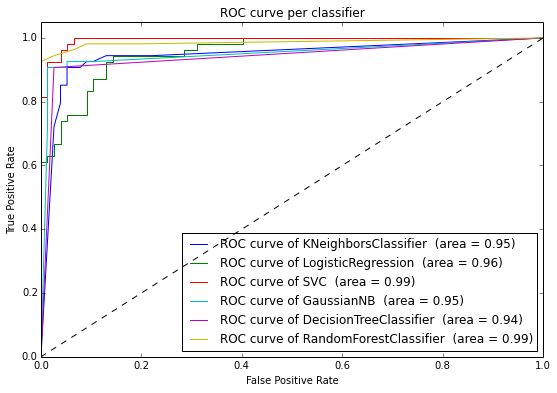

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

for i, alg in enumerate([
            KNeighborsClassifier(n_neighbors=10), 
            LogisticRegression(C=0.001), 
            SVC(),  
            GaussianNB(), 
            DecisionTreeClassifier(), 
            RandomForestClassifier()]):
    alg.fit(X_train, Y_train)
    y_pred = alg.predict(X_test)

    try:
        y_score = alg.fit(X_train, Y_train).decision_function(X_test)
    except:
        y_score = (alg.fit(X_train, Y_train).predict_proba(X_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(y_obs, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per classifier')
plt.legend(loc="lower right")

### <a id='3'></a> Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in McNulty's Supervised Challenge 9)

In [62]:
# Irmak's code from McNulty's supervised challenges    
from sklearn.cross_validation import cross_val_score
import re

print '\nAlgorithm \t\t\tAccuracy \tPrecision \tRecall \tF1'
print '-'*85
for algorithm in [KNeighborsClassifier(n_neighbors=10),
                  LogisticRegression(C=0.001), 
                  SVC(),
                  GaussianNB(),
                  DecisionTreeClassifier(),
                  RandomForestClassifier()]:
    
    # just to get clean label
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]

    
    accuracy = np.mean(cross_val_score(algorithm, X,Y, cv=10, scoring='accuracy')) #10-fold cross validation
    precision = np.mean(cross_val_score(algorithm, X,Y, cv=10, scoring='precision')) #10-fold cross validation
    recall = np.mean(cross_val_score(algorithm, X,Y, cv=10, scoring='recall')) #10-fold cross validation
    f1 = np.mean(cross_val_score(algorithm, X,Y, cv=10, scoring='f1')) #10-fold cross validation

    alg_name = alg_label.split('(')
    alg_name = alg_name[0]
    print '  %-30s %.4f \t%.4f \t\t%.4f \t%.4f' % (alg_name, accuracy, precision, recall, f1)
 



Algorithm 			Accuracy 	Precision 	Recall 	F1
-------------------------------------------------------------------------------------
  KNeighborsClassifier           0.9329 	0.9036 		0.9338 	0.9159
  LogisticRegression             0.8893 	0.9190 		0.7919 	0.8457
  SVC                            0.9583 	0.9347 		0.9643 	0.9476
  GaussianNB                     0.9398 	0.9259 		0.9221 	0.9227
  DecisionTreeClassifier         0.9376 	0.9221 		0.9408 	0.9207
  RandomForestClassifier         0.9559 	0.9333 		0.9224 	0.9416


### <a id='4'></a> Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [63]:
movies = pd.read_csv('2013_movies.csv')

In [64]:
def CheckData(df):
    print "len(data): "
    print len(df)
    print '-'*50
    
    print "column names:"
    print df.columns
    print '-'*50
    
    print "df.types"
    print df.dtypes
    print '-'*50 

    print "df.describe: "
    print df.describe()
    print '-'*50 
    
    print "df.head: "
    print df.head(3)
 
    #print df.tail(5)

    
CheckData(movies)

len(data): 
100
--------------------------------------------------
column names:
Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating', u'Runtime', u'ReleaseDate'], dtype='object')
--------------------------------------------------
df.types
Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object
--------------------------------------------------
df.describe: 
             Budget  DomesticTotalGross     Runtime
count  8.900000e+01        1.000000e+02  100.000000
mean   7.474719e+07        1.005969e+08  112.260000
std    5.941692e+07        8.739641e+07   18.190696
min    2.500000e+06        2.556825e+07   75.000000
25%    2.800000e+07        4.270413e+07   98.000000
50%    5.500000e+07        6.954237e+07  112.000000
75%    1.100000e+08        1.204759e+08  123.000000
max    2.250000e+08        4.24668

In [65]:
movies = pd.read_csv('2013_movies.csv')
movies = movies.dropna()
print 'BEFORE setting Rating to numeric'
print '-'*50
by_rating = movies.groupby('Rating')
print by_rating.count()

# replace values, do mapping
di = {"G": 0, "PG": 1, "PG-13": 2, "R": 3}
movies['Rating'].replace(di, inplace=True)


print '\nAFTER setting Rating to numeric'
print '-'*50
by_rating = movies.groupby('Rating')
print by_rating.count()

BEFORE setting Rating to numeric
--------------------------------------------------
        Title  Budget  DomesticTotalGross  Director  Runtime  ReleaseDate
Rating                                                                   
PG         14      14                  14        14       14           14
PG-13      40      40                  40        40       40           40
R          33      33                  33        33       33           33

AFTER setting Rating to numeric
--------------------------------------------------
        Title  Budget  DomesticTotalGross  Director  Runtime  ReleaseDate
Rating                                                                   
1          14      14                  14        14       14           14
2          40      40                  40        40       40           40
3          33      33                  33        33       33           33


In [66]:
X = movies[['Budget', 'DomesticTotalGross', 'Runtime']]
Y = movies['Rating']
Y_category=np.asarray(Y)

print "X.shape: ", X.shape
print "Y.shape: ", Y.shape

X.shape:  (87, 3)
Y.shape:  (87,)


Challenge 4
For your movie classifiers, calculate the precision and recall for each class.

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=4444)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_fscore_support

alg = OneVsRestClassifier(LogisticRegression())
alg.fit(X_train, Y_train)
y_pred = alg.predict(X_test)

#col_names = ["PG", "PG-13", "R"]
col_names = [1, 2, 3]
p, r, f, s = precision_recall_fscore_support(Y_test, y_pred, average=None, labels=col_names)

print "Y_test: ", Y_test
print "y_pred: ", y_pred

print "\nPrecision (for each class): ", p
print "Recall (for each class):    ", r

Y_test:  [3 2 2 1 1 1 2 3 3 3 2 2 2 3 3 2 2 1 3 2 3 2 2 1 3 3 3]
y_pred:  [2 2 2 2 2 2 2 3 3 2 2 2 2 2 3 2 3 2 2 2 2 3 2 2 2 2 2]

Precision (for each class):  [ 0.          0.40909091  0.6       ]
Recall (for each class):     [ 0.          0.81818182  0.27272727]


### <a id='5'></a> Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12 (McNulty supervised)

Description of Dataset:

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

8. Missing Attribute Values: None

In [68]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

In [69]:
data = pd.read_csv('haberman.data', header=None)

In [70]:
CheckData(data)

len(data): 
306
--------------------------------------------------
column names:
Int64Index([0, 1, 2, 3], dtype='int64')
--------------------------------------------------
df.types
0    int64
1    int64
2    int64
3    int64
dtype: object
--------------------------------------------------
df.describe: 
                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
--------------------------------------------------
df.head: 
    0   1  2  3
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1


In [71]:
!grep "NaN" haberman.data

In [72]:
!grep "78" haberman.data

78,65,1,2


In [73]:
data_clean = data.dropna()
print len(data_clean)

306


In [74]:
labels = ['age', 'year', 'nodes', 'survival']
data.columns=labels

# replace values, do mapping
di = {2: 0, 1:1}
data['survival'].replace(di, inplace=True)

X = data[['age', 'year', 'nodes']]
Y = data[['survival']]


In [75]:
data.describe()

,age,year,nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [76]:
data['survival'].sum()
print float(225)/float(306)

0.735294117647


In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=4444)

print "data.shape:    ", data.shape

print "\nX.shape:       ", X.shape
print "Y.shape:       ", Y.shape

print "\nX_train.shape: ", X_train.shape
print "Y_train.shape: ", Y_train.shape

print "\nX_test.shape:  ", X_test.shape
print "Y_test.shape:  ", Y_test.shape

data.shape:     (306, 4)

X.shape:        (306, 3)
Y.shape:        (306, 1)

X_train.shape:  (214, 3)
Y_train.shape:  (214, 1)

X_test.shape:   (92, 3)
Y_test.shape:   (92, 1)


//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


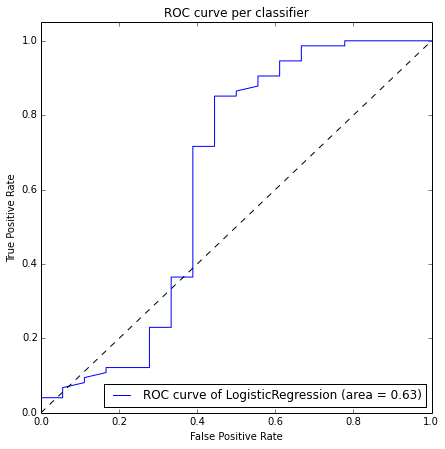

In [78]:
# Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12 (McNulty supervised)
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(7)
plt.subplot(1,1,1)

models = [LogisticRegression(C=0.001)]

for i, alg in enumerate(models):
    alg.fit(X_train, Y_train)
    y_pred = alg.predict(X_test)

    try:
        y_score = alg.fit(X_train, Y_train).decision_function(X_test)
    except:
        y_score = (alg.fit(X_train, Y_train).predict_proba(X_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(Y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of '+ alg_label +' (area = {1:0.2f})'.format(alg_label, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per classifier')
plt.legend(loc="lower right")